In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
DIR_PATH = '../data/data-ocr/data-ocr'
filename = os.path.join(DIR_PATH, 'E1887AE3-D4C7-4C59-B086-92142131BBE0.jpg')

In [3]:
img_arr = cv2.imread(filename)

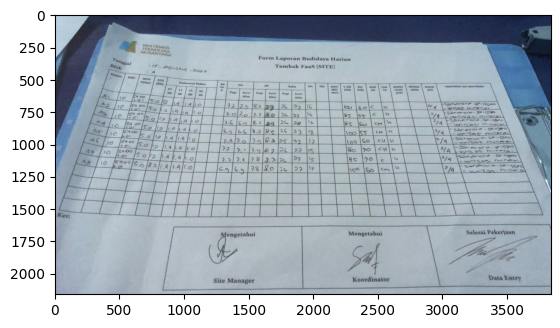

In [4]:
plt.imshow(img_arr)

In [5]:
with open('../data/keypoints/project-1-at-2023-02-06-22-39-83e2fe2f.json') as f:
    contents = json.load(f)

In [6]:
ori_width = contents[0]['annotations'][0]['result'][0]['original_width']
ori_height = contents[0]['annotations'][0]['result'][0]['original_height']

In [7]:
points = {}
for point in contents[0]['annotations'][0]['result']:
    label = point['value']['keypointlabels'][0]
    x = int((point['value']['x']/100) * ori_width)
    y = int((point['value']['y']/100) * ori_height)
    points[label] = (x, y)

In [8]:
points

{'top-left': (415, 418),
 'top-right': (3361, 530),
 'bottom-left': (26, 1507),
 'bottom-right': (3767, 1543)}

In [9]:
width = abs(points['top-left'][0] - points['top-right'][0])
height = abs(points['top-left'][1] - points['bottom-left'][1])
width, height

(2946, 1089)

In [10]:
pts1 = np.float32([list(point) for key, point in points.items()])

In [12]:
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

In [13]:
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_arr, M, (width,height))

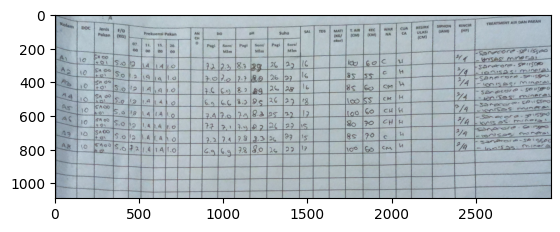

In [14]:
plt.imshow(dst)

In [17]:
cv2.imwrite('transform_perspective.jpg', dst)

True